In [33]:
# A demonstration of time-series decomposition into trend,
# seasonal, and irregular (residual) terms

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [22]:
# Build the model to produce observation data

np.random.seed(314159)  # for reproducibility
n = 200  # number of data points
t = np.arange(n)

# Trend component
y_intercept = 50
slope = 0.66
trend = y_intercept + slope * t

# Seasonal component with a period of 20

period = 20
amplitude = 10 # assumed to be fixed in this model
seasonality = amplitude * (np.sin(2 * np.pi * t / period))

# Residuals are normally distributed 
# mean=0, stdev=1  (σ = sqrt[ Σ ( xi - μ )^2 / N ])
scale = 2 # a scaling factor
residuals = scale * np.random.normal(0, 1, n)

# Observed data
y = trend + seasonality + residuals

In [23]:
# convert to a pandas dataframe
df = pd.DataFrame(y, columns=['Data'])
df.index.name = 'Time'
df

,Data
Time,
0,50.420665
1,56.370128
2,55.442452
3,59.719252
4,65.028366
...,...
195,171.874677
196,168.112092
197,171.922427


<AxesSubplot: xlabel='Time', ylabel='Data'>

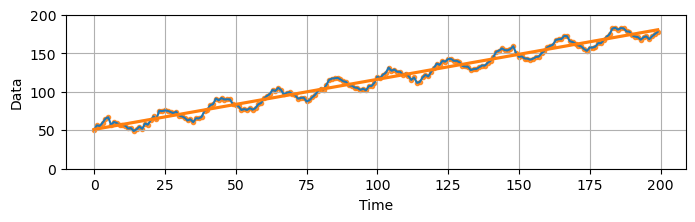

In [24]:
# Plot the data
plt.figure(figsize=(8,2))
plt.plot(df.Data)
plt.ylabel('Observed')
plt.xlabel('Time')
plt.ylim(0, 200)
plt.grid()

import seaborn as sns
sns.regplot(df, x=df.index, y=df.Data, marker='.')

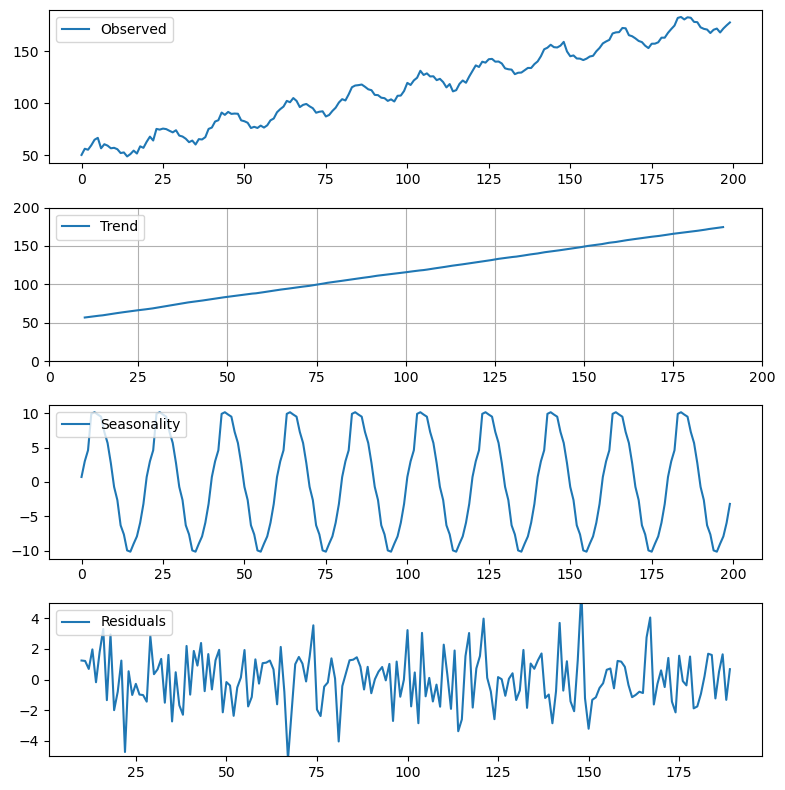

In [25]:
# Decompose the time series
result = seasonal_decompose(df['Data'], model='additive', period=period)

# Plot the components
plt.figure(figsize=(8, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Data'], label='Observed')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')
plt.ylim(0,200)
plt.xlim(0, 200)
plt.grid()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residuals')
plt.ylim(-5,5)
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

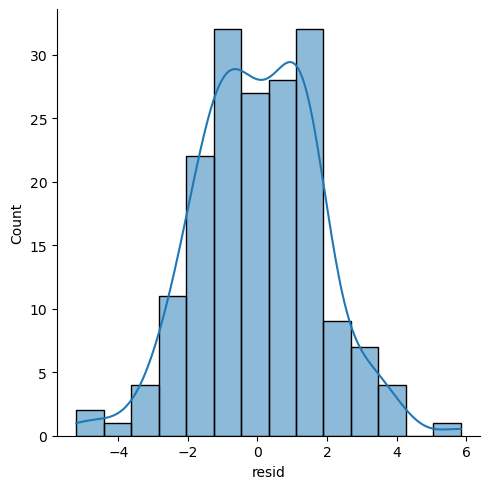

In [26]:
sns.displot(result.resid, kde=True)